In [1]:
# Needed for functions
import time
import numpy as np
from numpy import pi
from copy import deepcopy
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import random

#import packages for classical algorithm
import ctypes
from numpy import ctypeslib as npct

#import packages for quantum algorithm
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
import qiskit.quantum_info as qi

In [2]:
#initialize variables for classical solver
array_1d_double = npct.ndpointer(dtype=np.double, ndim=1, flags='CONTIGUOUS')
array_1d_int = npct.ndpointer(dtype=np.int_, ndim=1, flags='CONTIGUOUS')

c_lib_numpy = npct.load_library("lib/SATProbCalc.so", ".")

c_lib_numpy.SolveSATbpp.restype = ctypes.c_int #ctypes.POINTER(ctypes.c_double * (10**2))
c_lib_numpy.SolveSATbpp.argtypes = [ctypes.c_int, array_1d_double, ctypes.c_int, ctypes.c_int]

def SolveSATbpp(n, sat, clauses, iterations):
    steps = c_lib_numpy.SolveSATbpp(n, sat.flatten(), clauses, iterations)
    return steps

In [3]:
def buildSatSingleSolution(numVar):
    sat = [[-1,-2,-3],[-1,2,3],[1,-2,3],[1,2,-3],[-1,-2,3],[-1,2,-3],[1,-2,-3]]
    for n in range(4,numVar+1):
        sat.append([-2,-3,-n])
        sat.append([2,3,-n])
        sat.append([-2,-3,n])
    return sat

In [4]:
def classicalStatistics(n, SAT, c, i, numRuns):
    
    stepList = []
    for x in range(numRuns):
        stepList.append(SolveSATbpp(n, SAT, c, i))
    
    counter = Counter(stepList)
    res = {item: count for item, count in counter.items()}
#     print(res)
    
    return stepList

In [5]:
def classicalSolve2():
    n = 6
    c = 3*n - 2
    i = 1000
    
    SAT = buildSatSingleSolution(n)

    SAT = np.array(SAT).astype('double')
#     for x in range(len(SAT)):
#         SAT[x] = -SAT[x]
    # print(SAT)

    start = time.time()
    res = classicalStatistics(n, SAT, c, i, 10000000)
    print("C++ time to solve: " , start - time.time())

    return res

def classicalSolve():
    n = 4
    c = 2
    i = 1000
    
    SAT = [[-1,2,3],[1,2,-4]]

    SAT = np.array(SAT).astype('double')
#     for x in range(len(SAT)):
#         SAT[x] = -SAT[x]
    # print(SAT)

    start = time.time()
    res = classicalStatistics(n, SAT, c, i, 10000000)
    print("C++ time to solve: " , start - time.time())

    return res

In [6]:
def checkSAT(SAT, state, c, n):
        
    for t in range(c):
        # //get the variables the clause is interested in
        seive = (1 << (abs(int(SAT[t][0])) - 1)) + (1 << (int(abs(SAT[t][1])) - 1)) + (1 << (int(abs(SAT[t][2])) - 1))
        # //get the values in the clause to xor
        gate = 0
            
        if (SAT[t][0] > 0):
            gate += 1 << (abs(int((SAT[t][0]))) - 1)
        if (SAT[t][1] > 0):
            gate += 1 << (abs(int((SAT[t][1]))) - 1)
        if (SAT[t][2] > 0):
            gate += 1 << (abs(int((SAT[t][2]))) - 1)

        a = seive & state
        b = gate ^ a

        if (b == 0):
            return False
    return True

In [7]:
def exhausting(SAT,c,n):
#     print(1 << 1 == 2)
    solutions = []
    
    for t in range(c):
        print((int(SAT[t][0]))," ",(int(SAT[t][1]))," ",(int(SAT[t][2])))
    
    for s in range(0,2**n):
        
        state = int(s)
        if(checkSAT(SAT, state, c, n)):
            solutions.append(state)
    return solutions
            

In [8]:
def genRandomSAT(SAT,c,n):
#     print(1 << 1 == 2)
    solutions = []
    
    
    for t in range(c):
        print((int(SAT[t][0]))," ",(int(SAT[t][1]))," ",(int(SAT[t][2])))
    
    for s in range(0,2**n):
        
        state = int(s)
        if(checkSAT(SAT, state, c, n)):
            solutions.append(state)
    return solutions
            
# n = 7
# c = 3*n - 2
# # i = 1000

# SAT = buildSatSingleSolution(n)
# # random.shuffle(SAT)
# solutions = exhausting(SAT,c,n)
# print(solutions)

C++ time to solve:  -82.11081147193909


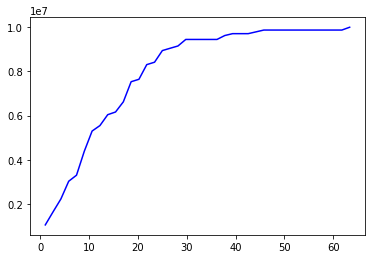

In [11]:
res = classicalSolve2()

# myKeys = list(res.keys())
# myKeys.sort()
# sorted_dict = {i: res[i] for i in myKeys}
 
# print(sorted_dict)

values, base = np.histogram(res, bins=40)
#evaluate the cumulative
cumulative = np.cumsum(values)
# plot the cumulative function
plt.plot(base[:-1], cumulative, c='blue')

# cumsum = np.cumsum(sorted_dict.values())
# # plt.plot(list(map(int,sorted_dict.keys())),sorted_dict.values())
# plt.plot(list(map(int,sorted_dict.keys())),cumsum)


In [10]:
res = classicalSolve2()

myKeys = list(res.keys())
myKeys.sort()
sorted_dict = {i: res[i] for i in myKeys}

 
print(sorted_dict)

plt.plot(list(map(int,sorted_dict.keys())),sorted_dict.values())

C++ time to solve:  -61.64433193206787


AttributeError: 'list' object has no attribute 'keys'

In [ ]:
res = classicalSolve()

myKeys = list(res.keys())
myKeys.sort()
sorted_dict = {i: res[i] for i in myKeys}

 
print(sorted_dict)

plt.plot(list(map(int,sorted_dict.keys())),sorted_dict.values())